In [14]:
import tensorflow as tf
import zipfile
import os 
import random
import csv
import math
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [15]:
#extracting data from zip
try:
    local_zip = './data/archive_data/new_dataset.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data/data_2')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

In [16]:
root = './data/data_2/ISIC_Labelled'
file = []
for files in os.walk(root, topdown=True):
    file.append(files)
    
ffile = file[1:]
file = []
counter = 0
for x in ffile:
    counter += len(x[2])

print(f"there is {counter} data in data_2")
tumor_2 = len(os.listdir(root))
print(f"with {tumor_2} classifications")

there is 25331 data in data_2
with 8 classifications


In [17]:
dir_2 = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
root_dir = "./data/final_dataset"
def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)

    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(root_path, 'validation'))

    for i in dir_2:
        os.makedirs(os.path.join(f'{root_path}/training', i))
        os.makedirs(os.path.join(f'{root_path}/validation', i))
            
create_dir(root_path=root_dir)

In [18]:
path = './data/data_2/ISIC_Labelled'

dir_new = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
dir_old = ['Melanoma', 'Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis', 'Dermatofibroma', 'Vascular lesion', 'Squamous cell carcinoma']

counter = 0

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    name = os.path.splitext(filename)
    
    for i, x in enumerate(dir_old):
        if x in name:
            postfix = dir_new[i]
            new_name = os.path.join(path, postfix)
            os.rename(file_path, new_name)
            continue
    counter += 1

In [19]:
counter = 0

for file in (dir_2):
    dir = os.listdir(f"{path}/{file}")
    random.shuffle(dir)
    
    training = dir[:200]
    val = dir[200:239]
    print(f"Training data for {file} is {len(training)}")
    print(f"Validation data for {file} is {len(val)}\n")
    
    root = './data/data_2/ISIC_Labelled/'
    root_dest = './data/final_dataset'
    for i in training:
        source_img = os.path.join(f"{root}/{dir_2[counter]}", i)
        destination = os.path.join(f"{root_dest}/training/{dir_2[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(f"{root}/{dir_2[counter]}", i)
        destination = os.path.join(f"{root_dest}/validation/{dir_2[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Training data for melanoma is 200
Validation data for melanoma is 39

Training data for melanocytic_nevi is 200
Validation data for melanocytic_nevi is 39

Training data for basal_cell_carcinoma is 200
Validation data for basal_cell_carcinoma is 39

Training data for bowen_disease is 200
Validation data for bowen_disease is 39

Training data for benign_keratosis is 200
Validation data for benign_keratosis is 39

Training data for dermatofibroma is 200
Validation data for dermatofibroma is 39

Training data for vascular_lesions is 200
Validation data for vascular_lesions is 39

Training data for squamous_cell_carcinoma is 200
Validation data for squamous_cell_carcinoma is 39



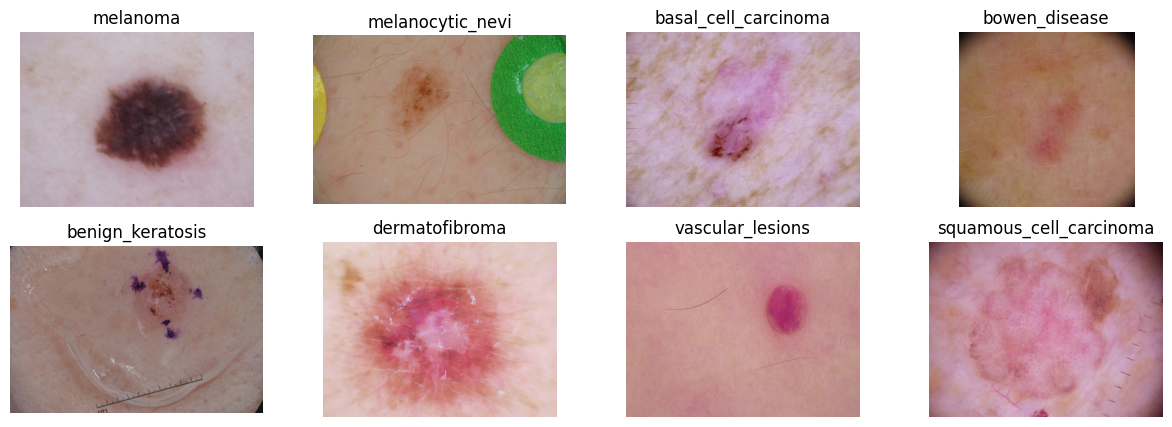

In [21]:
#show image example
root_path = './data/final_dataset/training/'
fig, axes = plt.subplots(2, 4, figsize=(15,5))
counter = 0
for i in range(2):
    for j in range(4):
        ax = axes[i][j]
        ax.set_title(dir_new[counter])
        ax.imshow(load_img(f"{os.path.join(f'{root_path}/{dir_new[counter]}', os.listdir(f'{root_path+dir_new[counter]}')[random.randint(0,100)])}"))
        ax.set_axis_off()
        plt.show
        counter += 1

In [22]:
training_main = './data/final_dataset/training'
validation_main = './data/final_dataset/validation'

In [23]:
training_paths = []
val_paths = []
for class_name in dir_new:
    training_path = os.path.join(training_main, class_name)
    val_path = os.path.join(validation_main, class_name)
    training_paths.append(training_path)
    val_paths.append(val_path)

In [24]:
for i, class_path in enumerate (training_paths):
    print(class_path)
print('\n')
for i, class_path in enumerate (val_paths):
    print(class_path)

./data/final_dataset/training\melanoma
./data/final_dataset/training\melanocytic_nevi
./data/final_dataset/training\basal_cell_carcinoma
./data/final_dataset/training\bowen_disease
./data/final_dataset/training\benign_keratosis
./data/final_dataset/training\dermatofibroma
./data/final_dataset/training\vascular_lesions
./data/final_dataset/training\squamous_cell_carcinoma


./data/final_dataset/validation\melanoma
./data/final_dataset/validation\melanocytic_nevi
./data/final_dataset/validation\basal_cell_carcinoma
./data/final_dataset/validation\bowen_disease
./data/final_dataset/validation\benign_keratosis
./data/final_dataset/validation\dermatofibroma
./data/final_dataset/validation\vascular_lesions
./data/final_dataset/validation\squamous_cell_carcinoma


In [209]:
def train_val_generators(training_main, validation_main):
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        directory=training_main,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation_main,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, validation_generator

In [210]:
train_generator, validation_generator = train_val_generators(training_main, validation_main)

Found 1600 images belonging to 8 classes.
Found 312 images belonging to 8 classes.


In [ ]:
def create_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation='softmax')
  ])
  

    model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])       
  
    return model

In [56]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 64)      

In [59]:
model = create_model()

# Train your model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=25)

Epoch 1/25
25/25 [==============================] - 91s 4s/step - loss: 2.0897 - accuracy: 0.1319 - val_loss: 2.0732 - val_accuracy: 0.1250
Epoch 2/25
25/25 [==============================] - 72s 3s/step - loss: 2.0686 - accuracy: 0.1475 - val_loss: 2.0266 - val_accuracy: 0.1474
Epoch 3/25
25/25 [==============================] - 92s 4s/step - loss: 2.0064 - accuracy: 0.2050 - val_loss: 1.9713 - val_accuracy: 0.2404
Epoch 4/25
25/25 [==============================] - 70s 3s/step - loss: 1.9414 - accuracy: 0.2219 - val_loss: 1.9051 - val_accuracy: 0.2436
Epoch 5/25
25/25 [==============================] - 86s 3s/step - loss: 1.8930 - accuracy: 0.2612 - val_loss: 1.9745 - val_accuracy: 0.2436
Epoch 6/25
25/25 [==============================] - 65s 3s/step - loss: 1.8677 - accuracy: 0.2738 - val_loss: 1.9000 - val_accuracy: 0.2564
Epoch 7/25
25/25 [==============================] - 68s 3s/step - loss: 1.8579 - accuracy: 0.2719 - val_loss: 1.8810 - val_accuracy: 0.2692
Epoch 8/25
25/25 [==

# Transfer Learning (VGG16)

In [211]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

In [201]:
import numpy as np
vgg = VGG16(include_top=False, input_shape = (150,150,3))

In [212]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False ## Not trainable weights

## Preprocessing input
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [241]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
es = EarlyStopping(monitor='accuracy', mode='max', patience=5,  restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1)

In [242]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90: # @KEEP
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True
                
callbacks = myCallback()

In [239]:
import random
tf.random.set_seed(33)
def create_model():
    
    model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAvgPool2D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
  ])
  

    model.compile(optimizer = tf.optimizers.SGD(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])       
  
    return model

In [245]:
history2 = model.fit(train_generator, validation_data=validation_generator, validation_steps=int(0.15*len(validation_generator)),epochs = 50, batch_size = 32, callbacks=[reduce_lr, callbacks])

Epoch 1/50
25/25 [==============================] - 66s 3s/step - loss: 0.4073 - accuracy: 0.8569 - val_loss: 1.3899 - val_accuracy: 0.6562 - lr: 8.0000e-10
Epoch 2/50
25/25 [==============================] - 67s 3s/step - loss: 0.4111 - accuracy: 0.8587 - val_loss: 1.4287 - val_accuracy: 0.5312 - lr: 8.0000e-10
Epoch 3/50
25/25 [==============================] - 67s 3s/step - loss: 0.4096 - accuracy: 0.8519 - val_loss: 1.1667 - val_accuracy: 0.5625 - lr: 8.0000e-10
Epoch 4/50
25/25 [==============================] - ETA: 0s - loss: 0.4101 - accuracy: 0.8500
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.5999999103399887e-10.
25/25 [==============================] - 67s 3s/step - loss: 0.4101 - accuracy: 0.8500 - val_loss: 1.3428 - val_accuracy: 0.5625 - lr: 8.0000e-10
Epoch 5/50
 7/25 [=======>......................] - ETA: 44s - loss: 0.4123 - accuracy: 0.8504

KeyboardInterrupt: 

# Transfer Learning (MobilenetV2)

In [169]:
# tf.random.set_seed(42)
# base_model = tf.keras.applications.MobileNetV2(include_top=False)
# base_model.trainable= False

# inputs = tf.keras.layers.Input(shape=(150,150,3),name = "input_shape",dtype=tf.float16)
# x = base_model(inputs,training=False)
# x = tf.keras.layers.GlobalAvgPool2D(name="global_average_pooling_layer")(x)
# outputs = tf.keras.layers.Dense(8,activation='softmax',dtype=tf.float32,name='outputs')(x)

# model_2 = Model(inputs,outputs)

# model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

# model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (InputLayer)    [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 outputs (Dense)             (None, 8)                 10248     
                                                                 
Total params: 2,268,232
Trainable params: 10,248
Non-trainable params: 2,257,984
_________________________________________________________________


In [244]:
# history2 = model_2.fit(train_generator, validation_data=validation_generator, validation_steps=int(0.15*len(validation_generator)),epochs = 20, batch_size = 32, callbacks=[es])